In [1]:
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Data Preparation

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import load_model

In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
np.unique(y_train,return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [6]:
x_train = x_train.reshape((-1,28,28,1))
y_train = np_utils.to_categorical(y_train)

In [7]:
print(x_train.shape,y_train.shape)

(60000, 28, 28, 1) (60000, 10)


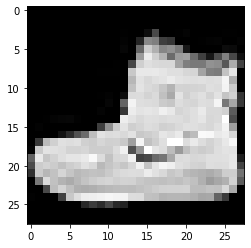

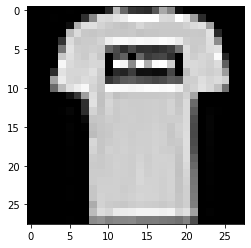

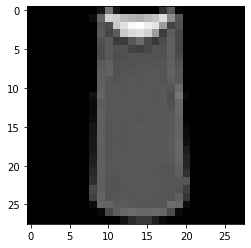

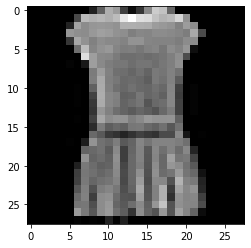

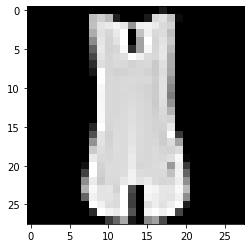

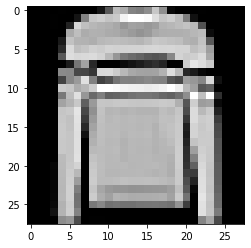

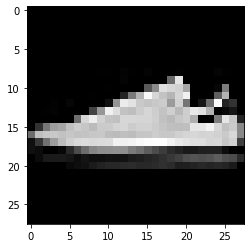

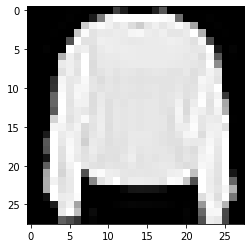

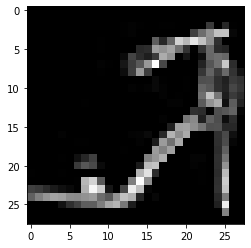

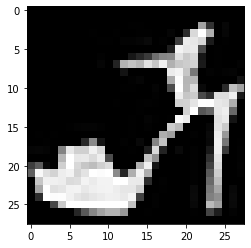

In [10]:
for i in range(10):
    plt.imshow(x_train[i].reshape(28,28),cmap="gray")
    plt.show()

## CNN Model

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(Conv2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [16]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
hist = model.fit(x_train,y_train,epochs=20,batch_size=256,validation_split=0.20)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 55s 1ms/step - loss: 2.4057 - accuracy: 0.1731 - val_loss: 1.9769 - val_accuracy: 0.2447
Epoch 2/20
48000/48000 [==============================] - 53s 1ms/step - loss: 1.7346 - accuracy: 0.3446 - val_loss: 1.4182 - val_accuracy: 0.4903
Epoch 3/20
48000/48000 [==============================] - 53s 1ms/step - loss: 1.2006 - accuracy: 0.5738 - val_loss: 1.0295 - val_accuracy: 0.6454
Epoch 4/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.7508 - accuracy: 0.7384 - val_loss: 0.5632 - val_accuracy: 0.8087
Epoch 5/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.5033 - accuracy: 0.8274 - val_loss: 0.4984 - val_accuracy: 0.8236
Epoch 6/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.4400 - accuracy: 0.8471 - val_loss: 0.4404 - val_accuracy: 0.8439
Epoch 7/20
48000/48000 [==============================] - 73s 2ms/st

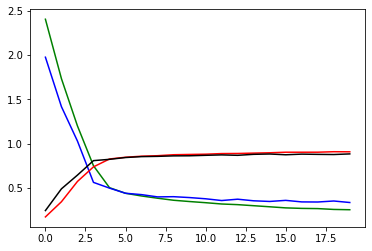

In [18]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()